In [0]:
import numpy as np
import pandas as pd
from PIL import Image
import math 

In [2]:
import torch 
precision = 'fp32'
ssd_model = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_ssd', model_math=precision)

Downloading: "https://github.com/NVIDIA/DeepLearningExamples/archive/torchhub.zip" to /root/.cache/torch/hub/torchhub.zip
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [3]:
pip install numpy scipy scikit-image matplotlib

In [4]:
utils = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_ssd_processing_utils')

Using cache found in /root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub


In [5]:
ssd_model.to('cuda')
ssd_model.eval()


SSD300(
  (feature_extractor): ResNet(
    (feature_extractor): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplac

In [0]:
import glob

image_list = glob.glob('/content/drive/My Drive/Colab Notebooks/VisDrone2019-DET-val/images/*.jpg')

In [0]:
inputs = [utils.prepare_input(uri) for uri in image_list]
tensor = utils.prepare_tensor(inputs, precision == 'fp16')

In [0]:
with torch.no_grad():
    detections_batch = ssd_model(tensor)

In [0]:
results_per_input = utils.decode_results(detections_batch)
best_results_per_input = [utils.pick_best(results, 0.0) for results in results_per_input]

In [10]:
best_results_per_input[0]

[array([[0.49924836, 0.26488113, 0.51285625, 0.28404653],
        [0.26619726, 0.2685234 , 0.74907917, 0.6878375 ],
        [0.51047885, 0.18018727, 0.5337763 , 0.20298629],
        [0.4958634 , 0.2804547 , 0.5107622 , 0.30116445],
        [0.5430118 , 0.23294106, 0.55995965, 0.25480407],
        [0.513809  , 0.23111969, 0.5299848 , 0.24985802],
        [0.513041  , 0.19431725, 0.5325625 , 0.21761289],
        [0.79073286, 0.4421481 , 0.87645304, 0.6326816 ],
        [0.54511505, 0.25970823, 0.5599219 , 0.2808125 ],
        [0.10907187, 0.6537374 , 0.13567324, 0.71001446],
        [0.5114845 , 0.26487246, 0.527015  , 0.2837352 ],
        [0.07694644, 0.94213235, 0.15096474, 1.0009186 ],
        [0.19677804, 0.92194194, 0.32453537, 1.0027974 ],
        [0.9503366 , 0.37872118, 1.0008751 , 0.49804658],
        [0.5039203 , 0.30690238, 0.5282047 , 0.34157506],
        [0.50936747, 0.6183155 , 0.551273  , 0.68749565],
        [0.5193652 , 0.41656166, 0.5602424 , 0.46834248],
        [0.036

In [11]:
classes_to_labels = utils.get_coco_object_dictionary()

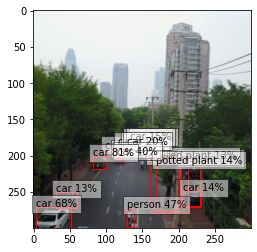

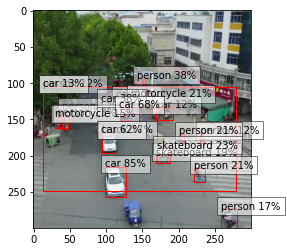

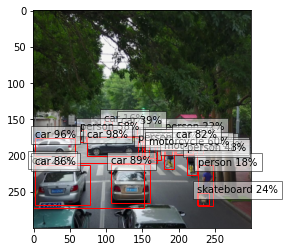

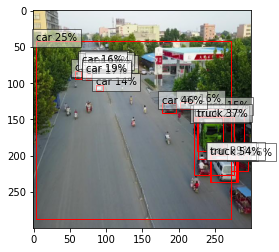

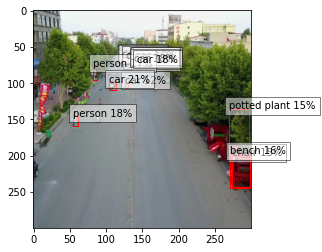

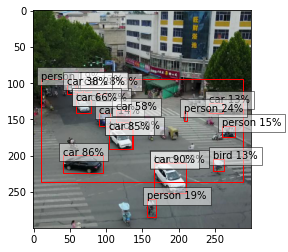

In [12]:
from matplotlib import pyplot as plt
import matplotlib.patches as patches

for image_idx in range(2,8):
    fig, ax = plt.subplots(1)
    # Show original, denormalized image...
    image = inputs[image_idx] / 2 + 0.5
    ax.imshow(image)
    # ...with detections
    bboxes, classes, confidences = best_results_per_input[image_idx]
    for idx in range(len(bboxes)):
        left, bot, right, top = bboxes[idx]
        x, y, w, h = [val * 300 for val in [left, bot, right - left, top - bot]]
        rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(x, y, "{} {:.0f}%".format(classes_to_labels[classes[idx] - 1], confidences[idx]*100), bbox=dict(facecolor='white', alpha=0.5))
plt.show()

In [0]:
annotation_list = glob.glob('/content/drive/My Drive/Colab Notebooks/VisDrone2019-DET-val/annotations/*.txt')

In [0]:
annotation = []
for i in annotation_list:
  annotation.append(np.genfromtxt(i, delimiter = ',', dtype = np.float))

In [0]:
import os
name_ann = '/content/drive/My Drive/Colab Notebooks/VisDrone2019-DET-val/annotations/'
name_annot = os.listdir(name_ann)

name_im = '/content/drive/My Drive/Colab Notebooks/VisDrone2019-DET-val/images/'
name_image = os.listdir(name_im)

In [0]:
cols = ['bbox_left', 'bbox_top', 'bbox_width', 'bbox_height', 'score', 'classes', 'truncation', 'occlusion']
def parcing(name_annot, annotation):
  dat_ann = pd.DataFrame()
  for i in range(len(annotation)):
    dat_ann_i = pd.DataFrame(np.matrix(annotation[i]))
    dat_ann_i['name_annotation'] = np.full(len(np.matrix(annotation[i])) , name_annot[i][0:-4])
    dat_ann = dat_ann.append(dat_ann_i, ignore_index = True)
  dat_ann[cols] = dat_ann[[0, 1, 2, 3, 4, 5, 6, 7]]
  dat_ann = dat_ann.drop([0, 1, 2, 3, 4, 5, 6, 7], axis = 1)
  return dat_ann

In [17]:
data_annotation = parcing(name_annot, annotation)
data_annotation

,name_annotation,bbox_left,bbox_top,bbox_width,bbox_height,score,classes,truncation,occlusion
0,0000271_02601_d_0000386,562.0,577.0,72.0,139.0,1.0,4.0,0.0,0.0
1,0000271_02601_d_0000386,476.0,454.0,67.0,88.0,1.0,4.0,0.0,0.0
2,0000271_02601_d_0000386,302.0,480.0,135.0,64.0,1.0,4.0,0.0,0.0
3,0000271_02601_d_0000386,27.0,627.0,179.0,80.0,1.0,4.0,0.0,0.0
4,0000271_02601_d_0000386,9.0,557.0,159.0,70.0,1.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
40164,0000086_01443_d_0000004,930.0,34.0,14.0,19.0,1.0,1.0,0.0,1.0
40165,0000086_01443_d_0000004,97.0,38.0,15.0,18.0,1.0,10.0,0.0,1.0
40166,0000086_01443_d_0000004,48.0,43.0,10.0,15.0,1.0,10.0,0.0,1.0
40167,0000086_01443_d_0000004,0.0,33.0,45.0,33.0,0.0,0.0,0.0,0.0


In [0]:
def parcing_train(name_image, annotation):
  dat_ann_train = pd.DataFrame()
  for i in range(len(annotation)):
    dat_ann_i = pd.DataFrame(annotation[i][0])
    left = dat_ann_i[0]
    bot = dat_ann_i[1]
    right = dat_ann_i[2]
    top = dat_ann_i[3]
    dat_ann_i[0], dat_ann_i[1], dat_ann_i[2], dat_ann_i[3] = [val * 300 for val in [left, bot, right - left, top - bot]]
    for j in range(len(dat_ann_i)):
      dat_ann_i['name_image'] = name_image[i][0:-4]
    dat_ann_i['classes'] = pd.DataFrame(np.row_stack(annotation[i][1]))
    dat_ann_i['confidence'] = pd.DataFrame(np.row_stack(annotation[i][2]))
    dat_ann_train = dat_ann_train.append(dat_ann_i, ignore_index = True)
  dat_ann_train[cols[0:4]] = dat_ann_train[[0, 1, 2, 3]]
  dat_ann_train = dat_ann_train.drop([0, 1, 2, 3], axis = 1)
  return dat_ann_train


In [19]:
data_annotation_train = parcing_train(name_image, best_results_per_input)
data_annotation_train

,name_image,classes,confidence,bbox_left,bbox_top,bbox_width,bbox_height
0,0000193_02212_d_0000115,3,0.118395,149.774506,79.464340,4.082367,5.749619
1,0000193_02212_d_0000115,3,0.120524,79.859177,80.557022,144.864578,125.794228
2,0000193_02212_d_0000115,3,0.122040,153.143661,54.056183,6.989229,6.839705
3,0000193_02212_d_0000115,3,0.122149,148.759018,84.136406,4.469642,6.212926
4,0000193_02212_d_0000115,3,0.123405,162.903534,69.882317,5.084360,6.558904
...,...,...,...,...,...,...,...
10767,0000193_02416_d_0000116,3,0.133415,181.693130,244.916809,12.826788,14.920557
10768,0000193_02416_d_0000116,3,0.133601,168.536438,252.718460,6.776655,9.260988
10769,0000193_02416_d_0000116,3,0.137108,108.078957,184.735352,145.381348,113.985229
10770,0000193_02416_d_0000116,3,0.170999,166.651901,127.979652,10.828436,12.705803


In [20]:
image_width = []
image_height = []

for i in range(len(image_list)):
  im = Image.open(image_list[i])
  width, height = im.size
  image_width.append(width)
  image_height.append(height)

coef_compr = []
for i in range(len(image_height)):
  coef_compr.append(300 / image_height[i])

data1 = pd.DataFrame({"name_annotation": pd.Series(name_image),
                      "width": pd.Series(image_width),
                      "height": pd.Series(image_height),
                      "coef_compression": pd.Series(coef_compr)})

for i in range(len(image_height)):
  data1.name_annotation[i] = data1.name_annotation[i][0:-4]

data_annotation = data_annotation.merge(data1, how = 'left', left_on = 'name_annotation', right_on = 'name_annotation')
data_annotation

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,name_annotation,bbox_left,bbox_top,bbox_width,bbox_height,score,classes,truncation,occlusion,width,height,coef_compression
0,0000271_02601_d_0000386,562.0,577.0,72.0,139.0,1.0,4.0,0.0,0.0,1360,765,0.392157
1,0000271_02601_d_0000386,476.0,454.0,67.0,88.0,1.0,4.0,0.0,0.0,1360,765,0.392157
2,0000271_02601_d_0000386,302.0,480.0,135.0,64.0,1.0,4.0,0.0,0.0,1360,765,0.392157
3,0000271_02601_d_0000386,27.0,627.0,179.0,80.0,1.0,4.0,0.0,0.0,1360,765,0.392157
4,0000271_02601_d_0000386,9.0,557.0,159.0,70.0,1.0,4.0,0.0,0.0,1360,765,0.392157
...,...,...,...,...,...,...,...,...,...,...,...,...
40164,0000086_01443_d_0000004,930.0,34.0,14.0,19.0,1.0,1.0,0.0,1.0,960,540,0.555556
40165,0000086_01443_d_0000004,97.0,38.0,15.0,18.0,1.0,10.0,0.0,1.0,960,540,0.555556
40166,0000086_01443_d_0000004,48.0,43.0,10.0,15.0,1.0,10.0,0.0,1.0,960,540,0.555556
40167,0000086_01443_d_0000004,0.0,33.0,45.0,33.0,0.0,0.0,0.0,0.0,960,540,0.555556


In [21]:
columns = ['bbox_left', 'bbox_top', 'bbox_width', 'bbox_height', 'width', 'height']
for feature in columns:
  data_annotation[feature] = data_annotation[feature] * data_annotation['coef_compression'] 
data_annotation

,name_annotation,bbox_left,bbox_top,bbox_width,bbox_height,score,classes,truncation,occlusion,width,height,coef_compression
0,0000271_02601_d_0000386,220.392157,226.274510,28.235294,54.509804,1.0,4.0,0.0,0.0,533.333333,300.0,0.392157
1,0000271_02601_d_0000386,186.666667,178.039216,26.274510,34.509804,1.0,4.0,0.0,0.0,533.333333,300.0,0.392157
2,0000271_02601_d_0000386,118.431373,188.235294,52.941176,25.098039,1.0,4.0,0.0,0.0,533.333333,300.0,0.392157
3,0000271_02601_d_0000386,10.588235,245.882353,70.196078,31.372549,1.0,4.0,0.0,0.0,533.333333,300.0,0.392157
4,0000271_02601_d_0000386,3.529412,218.431373,62.352941,27.450980,1.0,4.0,0.0,0.0,533.333333,300.0,0.392157
...,...,...,...,...,...,...,...,...,...,...,...,...
40164,0000086_01443_d_0000004,516.666667,18.888889,7.777778,10.555556,1.0,1.0,0.0,1.0,533.333333,300.0,0.555556
40165,0000086_01443_d_0000004,53.888889,21.111111,8.333333,10.000000,1.0,10.0,0.0,1.0,533.333333,300.0,0.555556
40166,0000086_01443_d_0000004,26.666667,23.888889,5.555556,8.333333,1.0,10.0,0.0,1.0,533.333333,300.0,0.555556
40167,0000086_01443_d_0000004,0.000000,18.333333,25.000000,18.333333,0.0,0.0,0.0,0.0,533.333333,300.0,0.555556


In [22]:
data_annotation['bbox_right'] = data_annotation['bbox_left'] + data_annotation['bbox_width']
data_annotation['center'] = data_annotation['width'] / 2

data_annotation['new_left_border'] = data_annotation['center'] - 150
data_annotation['new_right_border'] = data_annotation['center'] + 150

data_annotation

,name_annotation,bbox_left,bbox_top,bbox_width,bbox_height,score,classes,truncation,occlusion,width,height,coef_compression,bbox_right,center,new_left_border,new_right_border
0,0000271_02601_d_0000386,220.392157,226.274510,28.235294,54.509804,1.0,4.0,0.0,0.0,533.333333,300.0,0.392157,248.627451,266.666667,116.666667,416.666667
1,0000271_02601_d_0000386,186.666667,178.039216,26.274510,34.509804,1.0,4.0,0.0,0.0,533.333333,300.0,0.392157,212.941176,266.666667,116.666667,416.666667
2,0000271_02601_d_0000386,118.431373,188.235294,52.941176,25.098039,1.0,4.0,0.0,0.0,533.333333,300.0,0.392157,171.372549,266.666667,116.666667,416.666667
3,0000271_02601_d_0000386,10.588235,245.882353,70.196078,31.372549,1.0,4.0,0.0,0.0,533.333333,300.0,0.392157,80.784314,266.666667,116.666667,416.666667
4,0000271_02601_d_0000386,3.529412,218.431373,62.352941,27.450980,1.0,4.0,0.0,0.0,533.333333,300.0,0.392157,65.882353,266.666667,116.666667,416.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40164,0000086_01443_d_0000004,516.666667,18.888889,7.777778,10.555556,1.0,1.0,0.0,1.0,533.333333,300.0,0.555556,524.444444,266.666667,116.666667,416.666667
40165,0000086_01443_d_0000004,53.888889,21.111111,8.333333,10.000000,1.0,10.0,0.0,1.0,533.333333,300.0,0.555556,62.222222,266.666667,116.666667,416.666667
40166,0000086_01443_d_0000004,26.666667,23.888889,5.555556,8.333333,1.0,10.0,0.0,1.0,533.333333,300.0,0.555556,32.222222,266.666667,116.666667,416.666667
40167,0000086_01443_d_0000004,0.000000,18.333333,25.000000,18.333333,0.0,0.0,0.0,0.0,533.333333,300.0,0.555556,25.000000,266.666667,116.666667,416.666667


In [23]:
data_annotation_vyb = data_annotation[(data_annotation['bbox_left'] >= data_annotation['new_left_border']) \
                                      & (data_annotation['bbox_left'] < data_annotation['new_right_border']) \
                                      & (data_annotation['bbox_right'] <= data_annotation['new_right_border']) \
                                      & (data_annotation['bbox_right'] > data_annotation['new_left_border'])]
data_annotation_vyb

,name_annotation,bbox_left,bbox_top,bbox_width,bbox_height,score,classes,truncation,occlusion,width,height,coef_compression,bbox_right,center,new_left_border,new_right_border
0,0000271_02601_d_0000386,220.392157,226.274510,28.235294,54.509804,1.0,4.0,0.0,0.0,533.333333,300.0,0.392157,248.627451,266.666667,116.666667,416.666667
1,0000271_02601_d_0000386,186.666667,178.039216,26.274510,34.509804,1.0,4.0,0.0,0.0,533.333333,300.0,0.392157,212.941176,266.666667,116.666667,416.666667
2,0000271_02601_d_0000386,118.431373,188.235294,52.941176,25.098039,1.0,4.0,0.0,0.0,533.333333,300.0,0.392157,171.372549,266.666667,116.666667,416.666667
5,0000271_02601_d_0000386,285.098039,118.039216,16.078431,19.607843,1.0,4.0,0.0,0.0,533.333333,300.0,0.392157,301.176471,266.666667,116.666667,416.666667
6,0000271_02601_d_0000386,262.352941,26.666667,7.843137,9.411765,1.0,4.0,0.0,0.0,533.333333,300.0,0.392157,270.196078,266.666667,116.666667,416.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40152,0000086_01443_d_0000004,333.888889,35.555556,3.888889,4.444444,1.0,2.0,0.0,0.0,533.333333,300.0,0.555556,337.777778,266.666667,116.666667,416.666667
40153,0000086_01443_d_0000004,340.000000,28.888889,5.000000,8.333333,1.0,1.0,0.0,0.0,533.333333,300.0,0.555556,345.000000,266.666667,116.666667,416.666667
40154,0000086_01443_d_0000004,332.222222,26.666667,4.444444,10.555556,1.0,1.0,0.0,1.0,533.333333,300.0,0.555556,336.666667,266.666667,116.666667,416.666667
40155,0000086_01443_d_0000004,302.222222,18.333333,3.888889,10.000000,1.0,1.0,0.0,1.0,533.333333,300.0,0.555556,306.111111,266.666667,116.666667,416.666667


In [24]:
columns1 = ['bbox_left', 'bbox_right', 'center', 'new_right_border', 'new_left_border']
for feature in columns1:
  data_annotation_vyb[feature] = data_annotation_vyb[feature] - data_annotation_vyb['new_left_border'] 
data_annotation_vyb

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,name_annotation,bbox_left,bbox_top,bbox_width,bbox_height,score,classes,truncation,occlusion,width,height,coef_compression,bbox_right,center,new_left_border,new_right_border
0,0000271_02601_d_0000386,103.725490,226.274510,28.235294,54.509804,1.0,4.0,0.0,0.0,533.333333,300.0,0.392157,131.960784,150.0,0.0,300.0
1,0000271_02601_d_0000386,70.000000,178.039216,26.274510,34.509804,1.0,4.0,0.0,0.0,533.333333,300.0,0.392157,96.274510,150.0,0.0,300.0
2,0000271_02601_d_0000386,1.764706,188.235294,52.941176,25.098039,1.0,4.0,0.0,0.0,533.333333,300.0,0.392157,54.705882,150.0,0.0,300.0
5,0000271_02601_d_0000386,168.431373,118.039216,16.078431,19.607843,1.0,4.0,0.0,0.0,533.333333,300.0,0.392157,184.509804,150.0,0.0,300.0
6,0000271_02601_d_0000386,145.686275,26.666667,7.843137,9.411765,1.0,4.0,0.0,0.0,533.333333,300.0,0.392157,153.529412,150.0,0.0,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40152,0000086_01443_d_0000004,217.222222,35.555556,3.888889,4.444444,1.0,2.0,0.0,0.0,533.333333,300.0,0.555556,221.111111,150.0,0.0,300.0
40153,0000086_01443_d_0000004,223.333333,28.888889,5.000000,8.333333,1.0,1.0,0.0,0.0,533.333333,300.0,0.555556,228.333333,150.0,0.0,300.0
40154,0000086_01443_d_0000004,215.555556,26.666667,4.444444,10.555556,1.0,1.0,0.0,1.0,533.333333,300.0,0.555556,220.000000,150.0,0.0,300.0
40155,0000086_01443_d_0000004,185.555556,18.333333,3.888889,10.000000,1.0,1.0,0.0,1.0,533.333333,300.0,0.555556,189.444444,150.0,0.0,300.0


In [25]:
data_annotation_vyb_1 = pd.DataFrame()
data_annotation_vyb_1 = data_annotation_vyb[['name_annotation', 'bbox_left', 'bbox_top', 'bbox_width', 'bbox_height', 'classes']]
data_annotation_vyb_1.head(3)

,name_annotation,bbox_left,bbox_top,bbox_width,bbox_height,classes
0,0000271_02601_d_0000386,103.725490,226.274510,28.235294,54.509804,4.0
1,0000271_02601_d_0000386,70.000000,178.039216,26.274510,34.509804,4.0
2,0000271_02601_d_0000386,1.764706,188.235294,52.941176,25.098039,4.0


In [26]:
data_annotation_train_1 = pd.DataFrame()
data_annotation_train_1 = data_annotation_train[['name_image', 'bbox_left', 'bbox_top', 'bbox_width', 'bbox_height', 'classes']]
data_annotation_train_1

,name_image,bbox_left,bbox_top,bbox_width,bbox_height,classes
0,0000193_02212_d_0000115,149.774506,79.464340,4.082367,5.749619,3
1,0000193_02212_d_0000115,79.859177,80.557022,144.864578,125.794228,3
2,0000193_02212_d_0000115,153.143661,54.056183,6.989229,6.839705,3
3,0000193_02212_d_0000115,148.759018,84.136406,4.469642,6.212926,3
4,0000193_02212_d_0000115,162.903534,69.882317,5.084360,6.558904,3
...,...,...,...,...,...,...
10767,0000193_02416_d_0000116,181.693130,244.916809,12.826788,14.920557,3
10768,0000193_02416_d_0000116,168.536438,252.718460,6.776655,9.260988,3
10769,0000193_02416_d_0000116,108.078957,184.735352,145.381348,113.985229,3
10770,0000193_02416_d_0000116,166.651901,127.979652,10.828436,12.705803,3


In [27]:
#classes of COCO
classes = pd.DataFrame(classes_to_labels, columns = ['class'])
classes

,class
0,person
1,bicycle
2,car
3,motorcycle
4,airplane
...,...
75,vase
76,scissors
77,teddy bear
78,hair drier


In [28]:
#our classes
for i in range(data_annotation_vyb_1.shape[0]):
  if(data_annotation_vyb_1.classes.iloc[i] == 0):
    data_annotation_vyb_1.classes.iloc[i] = 'ignored_region' 
  if(data_annotation_vyb_1.classes.iloc[i] in np.array([5, 7, 8, 10])):
    data_annotation_vyb_1.classes.iloc[i] = 'other_vehicle'
  if(data_annotation_vyb_1.classes.iloc[i] in np.array([1, 2])):
    data_annotation_vyb_1.classes.iloc[i] = 'people'
  if(data_annotation_vyb_1.classes.iloc[i] == 3):
    data_annotation_vyb_1.classes.iloc[i] = 'bicycle' 
  if(data_annotation_vyb_1.classes.iloc[i] == 6):
    data_annotation_vyb_1.classes.iloc[i] = 'truck'
  if(data_annotation_vyb_1.classes.iloc[i] == 9):
    data_annotation_vyb_1.classes.iloc[i] = 'bus'
  if(data_annotation_vyb_1.classes.iloc[i] == 4):
    data_annotation_vyb_1.classes.iloc[i] = 'сar'
  if(data_annotation_vyb_1.classes.iloc[i] == 11):
    data_annotation_vyb_1.classes.iloc[i] = 'other_1' 

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/pyt

In [29]:
#COCO classes
mas = np.concatenate((np.array([4, 5, 7]), np.array(range(9, 81))), axis = 0)

for i in range(data_annotation_train_1.shape[0]):
  if(data_annotation_train_1.classes.iloc[i] in mas):
    data_annotation_train_1.classes.iloc[i] = 'other'
  if(data_annotation_train_1.classes.iloc[i] == 1):
    data_annotation_train_1.classes.iloc[i] = 'people'
  if(data_annotation_train_1.classes.iloc[i] == 2):
    data_annotation_train_1.classes.iloc[i] = 'bicycle'
  if(data_annotation_train_1.classes.iloc[i] == 8):
    data_annotation_train_1.classes.iloc[i] = 'truck'
  if(data_annotation_train_1.classes.iloc[i] == 6):
    data_annotation_train_1.classes.iloc[i] = 'bus'
  if(data_annotation_train_1.classes.iloc[i] == 3):
    data_annotation_train_1.classes.iloc[i] = 'сar'


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/pyt

In [0]:
data_annotation_train_del = data_annotation_train_1[data_annotation_train_1['classes'] != 'other']
data_annotation_vyb_del = data_annotation_vyb_1[(data_annotation_vyb_1['classes'] != 'ignored_region')  
                                                & (data_annotation_vyb_1['classes'] != 'other_vehicle')
                                                & (data_annotation_vyb_1['classes'] != 'other_1')]

In [0]:
def max_in_list(lst): 
  assert lst
  m = lst[0]
  for i in lst:
    if i > m:
      m = i
  return m

In [0]:
def IoU(train, val):
  bbox_val = val.loc[:,('name_annotation','bbox_left','bbox_top','bbox_width','bbox_height','classes')]
  bbox_train = train.loc[:,('name_image', 'bbox_left','bbox_top','bbox_width','bbox_height','classes')]
  return_data = pd.DataFrame()
  return_1 = []
  return_2 = []
  for i in range(bbox_train.shape[0]):
    x_train = bbox_train.iloc[i,1]
    y_train = bbox_train.iloc[i,1]
    x_val = []
    y_val = []
    indx_val = []
    distinct = []
    peresec = []
    name_train = bbox_train.iloc[i,0]
    for j in range(bbox_val.shape[0]):
      name_val = bbox_val.iloc[j,0]
      if (name_train == name_val):
        width_train = bbox_train.iloc[i,3]
        height_train = bbox_train.iloc[i,4]

        width_val = bbox_val.iloc[j,3]
        height_val = bbox_val.iloc[j,4]

        x1_val = bbox_val.iloc[j,1]
        x2_val = bbox_val.iloc[j,1] + width_val
          
        y1_val = bbox_val.iloc[j,2]
        y2_val = bbox_val.iloc[j,2] - height_val
        
        x1_train = bbox_train.iloc[i,1]
        x2_train = bbox_train.iloc[i,1] + width_train
        
        y1_train = bbox_train.iloc[i,2]
        y2_train = bbox_train.iloc[i,2] - height_train
        
        xA = max(x1_train, x1_val)
        yA = max(y2_train, y2_val)
        xB = min(x2_train, x2_val)
        yB = min(y1_train, y1_val)
          
        w_p = xB - xA
        h_p = yB - yA

        if(w_p > 0):
          if(h_p > 0):
            interArea = w_p * h_p
          else:
            interArea = 0
        else:
          interArea = 0
        boxAArea = width_train * height_train
        boxBArea = height_val * width_val

        iou = interArea / float(boxAArea + boxBArea - interArea)
        indx_val.append(j)
        peresec.append(iou)
    
    if(peresec): 
      max_iou = max_in_list(peresec)
      for q in range(len(peresec)):
        if(peresec[q] == max_iou):
          index = indx_val[q]
          max_class = bbox_val.iloc[index, 5]
    else:
      peresec.append(0)
      max_iou = 0
      max_class = 'nothing'
    
    return_1.append(max_iou)
    return_2.append(max_class)

    print(i, ':', max_iou)
    print(max_class)
    print(bbox_train.iloc[i, 5])
    print('---------')
  return_data['iou'] = pd.Series(return_1)
  return_data['class_det'] = pd.Series(return_2)
  return return_data

In [46]:
IOU = IoU(data_annotation_train_del, data_annotation_vyb_del)

Streaming output truncated to the last 5000 lines.
people
people
---------
7477 : 0.6271268062109413
people
people
---------
7478 : 0.5069658481766006
people
people
---------
7479 : 0.5809039394566239
people
people
---------
7480 : 0.705609459247662
people
people
---------
7481 : 0.19284346102468836
people
people
---------
7482 : 0.714577238573247
people
people
---------
7483 : 0.6223540294891253
people
people
---------
7484 : 0.5344233565903185
people
people
---------
7485 : 0.1847697425521843
people
people
---------
7486 : 0.112748992670345
people
сar
---------
7487 : 0.24132035243929256
people
people
---------
7488 : 0.6175660628540885
people
people
---------
7489 : 0.3468472085550483
people
people
---------
7490 : 0.024831636930674483
people
people
---------
7491 : 0.07378852908934587
people
people
---------
7492 : 0.4286419874081756
сar
сar
---------
7493 : 0.0025372368722613066
сar
people
---------
7494 : 0.011314152157746392
people
сar
---------
7495 : 0.5305457774583793
people


In [61]:
data_annotation_train_it = pd.DataFrame()
data_annotation_train_it = data_annotation_train_del.copy().reset_index()
data_annotation_train_it['IoU'] = IOU['iou']
data_annotation_train_it['classes_det'] = IOU['class_det']
data_annotation_train_it

,index,name_image,bbox_left,bbox_top,bbox_width,bbox_height,classes,IoU,classes_det
0,0,0000193_02212_d_0000115,149.774506,79.464340,4.082367,5.749619,сar,0.440811,people
1,1,0000193_02212_d_0000115,79.859177,80.557022,144.864578,125.794228,сar,0.005454,truck
2,2,0000193_02212_d_0000115,153.143661,54.056183,6.989229,6.839705,сar,0.256098,сar
3,3,0000193_02212_d_0000115,148.759018,84.136406,4.469642,6.212926,сar,0.128729,сar
4,4,0000193_02212_d_0000115,162.903534,69.882317,5.084360,6.558904,сar,0.241613,truck
...,...,...,...,...,...,...,...,...,...
8721,10767,0000193_02416_d_0000116,181.693130,244.916809,12.826788,14.920557,сar,0.375469,people
8722,10768,0000193_02416_d_0000116,168.536438,252.718460,6.776655,9.260988,сar,0.016973,people
8723,10769,0000193_02416_d_0000116,108.078957,184.735352,145.381348,113.985229,сar,0.006333,сar
8724,10770,0000193_02416_d_0000116,166.651901,127.979652,10.828436,12.705803,сar,0.659166,сar


In [62]:
IOU[IOU['iou'] >= 0.5].shape[0]

3609

In [0]:
data_annotation_train_it.to_csv('/content/drive/My Drive/Colab Notebooks/data_annotation_train_it.csv', index = False, header = True)
data_annotation_vyb_1.to_csv('/content/drive/My Drive/Colab Notebooks/data_annotation_vyb_1.csv', index = False, header = True)
data_annotation_vyb_del.to_csv('/content/drive/My Drive/Colab Notebooks/data_annotation_vyb_del.csv', index = False, header = True)
data_annotation_train_del.to_csv('/content/drive/My Drive/Colab Notebooks/data_annotation_train_del.csv', index = False, header = True)
data_annotation_train_1.to_csv('/content/drive/My Drive/Colab Notebooks/data_annotation_train_1.csv', index = False, header = True)

In [64]:
data_annotation_train_it.loc[data_annotation_train_it['classes'] == data_annotation_train_it['classes_det'], 'correctly'] = 1
data_annotation_train_it.loc[data_annotation_train_it['classes'] != data_annotation_train_it['classes_det'], 'correctly'] = 0
data_annotation_train_it.head()


,index,name_image,bbox_left,bbox_top,bbox_width,bbox_height,classes,IoU,classes_det,correctly
0,0,0000193_02212_d_0000115,149.774506,79.464340,4.082367,5.749619,сar,0.440811,people,0.0
1,1,0000193_02212_d_0000115,79.859177,80.557022,144.864578,125.794228,сar,0.005454,truck,0.0
2,2,0000193_02212_d_0000115,153.143661,54.056183,6.989229,6.839705,сar,0.256098,сar,1.0
3,3,0000193_02212_d_0000115,148.759018,84.136406,4.469642,6.212926,сar,0.128729,сar,1.0
4,4,0000193_02212_d_0000115,162.903534,69.882317,5.084360,6.558904,сar,0.241613,truck,0.0


In [0]:
data_0_5 = data_annotation_train_it[data_annotation_train_it['IoU'] > 0.5]
data_0_75 = data_annotation_train_it[data_annotation_train_it['IoU'] > 0.75]
data_0_9 = data_annotation_train_it[data_annotation_train_it['IoU'] > 0.9]

In [0]:
def false_lose(data, dataset):
  falset = dataset.shape[0] - data[data['correctly'] == 1].shape[0]
  return falset

In [78]:
false_0_5 = false_lose(data_0_5, data_annotation_train_del)
false_0_75 = false_lose(data_0_75, data_annotation_train_del) 
false_0_9 = false_lose(data_0_9, data_annotation_train_del) 
false = pd.DataFrame([false_0_5, false_0_75, false_0_9], columns = ['false'], index = [0.5, 0.75, 0.9])
false

,false
0.50,5712
0.75,7438
0.90,8545


In [80]:
lose_0_5 = false_lose(data_0_5, data_annotation_vyb_del)
lose_0_75 = false_lose(data_0_75, data_annotation_vyb_del) 
lose_0_9 = false_lose(data_0_9, data_annotation_vyb_del) 
lose = pd.DataFrame([lose_0_5, lose_0_75, lose_0_9], columns = ['losses'], index = [0.5, 0.75, 0.9])
lose

,losses
0.50,19400
0.75,21126
0.90,22233


In [0]:
def accur(data):
  if (data.shape[0] == 0):
    return 0
  else:
    return data[data['correctly'] == 1].shape[0] * 100 / data.shape[0]

In [71]:
accur_0_5 = accur(data_0_5)
accur_0_75 = accur(data_0_75)
accur_0_9 = accur(data_0_9)
accur = pd.DataFrame([accur_0_5, accur_0_75, accur_0_9], columns = ['accurancy,%'], index = [0.5, 0.75, 0.9])
accur

,"accurancy,%"
0.50,83.513439
0.75,77.637131
0.90,75.416667


In [81]:
task_4 = pd.concat([accur, lose, false], axis = 1)
task_4

,"accurancy,%",losses,false
0.50,83.513439,19400,5712
0.75,77.637131,21126,7438
0.90,75.416667,22233,8545


In [0]:
data_5_people = data_0_5[data_0_5.classes_det == 'people'].reset_index()
data_5_bicycle = data_0_5[data_0_5.classes_det == 'bicycle'].reset_index()
data_5_car = data_0_5[data_0_5.classes_det == 'car'].reset_index()
data_5_bus = data_0_5[data_0_5.classes_det == 'bus'].reset_index()
data_5_truck = data_0_5[data_0_5.classes_det == 'truck'].reset_index()

In [0]:
data_75_bicycle = pd.DataFrame()
data_75_bicycle = data_75_bicycle.append(data_0_75[data_0_75.classes_det == 'bicycle']).reset_index()
data_75_people = data_0_75[data_0_75.classes_det == 'people'].reset_index()
data_75_car = data_0_75[data_0_75.classes_det == 'car'].reset_index()
data_75_bus = data_0_75[data_0_75.classes_det == 'bus'].reset_index()
data_75_truck = data_0_75[data_0_75.classes_det == 'truck'].reset_index()

In [0]:
data_9_bicycle = pd.DataFrame()
data_9_bicycle = data_9_bicycle.append(data_0_9[data_0_9.classes_det == 'bicycle']).reset_index()
data_9_people = data_0_9[data_0_9.classes_det == 'people'].reset_index()
data_9_car = data_0_9[data_0_9.classes_det == 'car'].reset_index()
data_9_bus = data_0_9[data_0_9.classes_det == 'bus'].reset_index()
data_9_truck = data_0_9[data_0_9.classes_det == 'truck'].reset_index()

In [0]:
tr_people = data_annotation_train_it[data_annotation_train_it['classes_det'] == 'people'].reset_index()
tr_bicycle = data_annotation_train_it[data_annotation_train_it['classes_det'] == 'bicycle'].reset_index()
tr_car = data_annotation_train_it[data_annotation_train_it['classes_det'] == 'car'].reset_index()
tr_bus = data_annotation_train_it[data_annotation_train_it['classes_det'] == 'bus'].reset_index()
tr_truck = data_annotation_train_it[data_annotation_train_it['classes_det'] == 'truck'].reset_index()

In [0]:
vyb_people = data_annotation_vyb_del[data_annotation_vyb_del['classes'] == 'people'].reset_index()
vyb_bicycle = data_annotation_vyb_del[data_annotation_vyb_del['classes'] == 'bicycle'].reset_index()
vyb_car = data_annotation_vyb_del[data_annotation_vyb_del['classes'] == 'car'].reset_index()
vyb_bus = data_annotation_vyb_del[data_annotation_vyb_del['classes'] == 'bus'].reset_index()
vyb_truck = data_annotation_vyb_del[data_annotation_vyb_del['classes'] == 'truck'].reset_index()


In [124]:
lose_5_people = false_lose(data_5_people, vyb_people)
lose_75_people = false_lose(data_75_people, vyb_people) 
lose_9_people = false_lose(data_9_people, vyb_people) 
lose_5_bicycle = false_lose(data_5_bicycle, vyb_bicycle)
lose_75_bicycle = false_lose(data_75_bicycle, vyb_bicycle) 
lose_9_bicycle = false_lose(data_9_bicycle, vyb_bicycle) 
lose_5_car = false_lose(data_5_car, vyb_car)
lose_75_car = false_lose(data_75_car, vyb_car) 
lose_9_car = false_lose(data_9_car, vyb_car) 
lose_5_bus = false_lose(data_5_bus, vyb_bus)
lose_75_bus = false_lose(data_75_bus, vyb_bus) 
lose_9_bus = false_lose(data_9_bus, vyb_bus) 
lose_5_truck = false_lose(data_5_truck, vyb_truck)
lose_75_truck = false_lose(data_75_truck, vyb_truck) 
lose_9_truck = false_lose(data_9_truck, vyb_truck) 

lose_cl = pd.DataFrame([lose_5_people, lose_75_people, lose_9_people, lose_5_bicycle, lose_75_bicycle, 
                        lose_9_bicycle, lose_5_car, lose_75_car, lose_9_car, lose_5_bus, 
                        lose_75_bus, lose_9_bus, lose_5_truck, lose_75_truck, lose_9_truck,], 
                       columns = ['losses'], index = ['0.5', '0.75', '0.9', '0.5', '0.75', '0.9', '0.5', '0.75', '0.9', 
                                                      '0.5', '0.75', '0.9', '0.5', '0.75', '0.9'])
lose_cl

,losses
0.5,9374
0.75,9784
0.9,9898
0.5,851
0.75,851
0.9,851
0.5,0
0.75,0
0.9,0
0.5,196


In [179]:
false_5_people = false_lose(data_5_people, tr_people)
false_75_people = false_lose(data_75_people, tr_people) 
false_9_people = false_lose(data_9_people, tr_people) 
false_5_bicycle = false_lose(data_5_bicycle, tr_bicycle)
false_75_bicycle = false_lose(data_75_bicycle, tr_bicycle) 
false_9_bicycle = false_lose(data_9_bicycle, tr_bicycle) 
false_5_car = false_lose(data_5_car, tr_car)
false_75_car = false_lose(data_75_car, tr_car) 
false_9_car = false_lose(data_9_car, tr_car) 
false_5_bus = false_lose(data_5_bus, tr_bus)
false_75_bus = false_lose(data_75_bus, tr_bus) 
false_9_bus = false_lose(data_9_bus, tr_bus) 
false_5_truck = false_lose(data_5_truck, tr_truck)
false_75_truck = false_lose(data_75_truck, tr_truck) 
false_9_truck = false_lose(data_9_truck, tr_truck) 

false_cl = pd.DataFrame([false_5_people, false_75_people, false_9_people, false_5_bicycle, false_75_bicycle, 
                        false_9_bicycle, false_5_car, false_75_car, false_9_car, false_5_bus, 
                        false_75_bus, false_9_bus, false_5_truck, false_75_truck, false_9_truck,], 
                       columns = ['false'], index = ['0.5', '0.75', '0.9', '0.5', '0.75', '0.9', '0.5', '0.75', '0.9', 
                                                      '0.5', '0.75', '0.9', '0.5', '0.75', '0.9'])
false_cl

,false
0.5,1709
0.75,2119
0.9,2233
0.5,123
0.75,123
0.9,123
0.5,0
0.75,0
0.9,0
0.5,139


In [0]:
def accur(data, dataset):
  if (dataset.shape[0] == 0):
    return 0
  else:
    return data[data['correctly'] == 1].shape[0] * 100 / dataset.shape[0]

In [178]:
accur_5_people = accur(data_5_people, tr_people)
accur_5_bicycle = accur(data_5_bicycle, tr_bicycle)
accur_5_car = accur(data_5_car, tr_car)
accur_5_bus = accur(data_5_bus, tr_bus)
accur_5_truck = accur(data_5_truck, tr_truck)
accur_75_people = accur(data_75_people, tr_people)
accur_75_bicycle = accur(data_75_bicycle, tr_bicycle)
accur_75_car = accur(data_75_car, tr_car)
accur_75_bus = accur(data_75_bus, tr_bus)
accur_75_truck = accur(data_75_truck, tr_truck)
accur_9_people = accur(data_9_people, tr_people)
accur_9_bicycle = accur(data_9_bicycle, tr_bicycle)
accur_9_car = accur(data_9_car, tr_car)
accur_9_bus = accur(data_9_bus, tr_bus)
accur_9_truck = accur(data_9_truck, tr_truck)

accur_cl = pd.DataFrame([accur_5_people, accur_75_people, accur_9_people, accur_5_bicycle, accur_75_bicycle, 
                        accur_9_bicycle, accur_5_car, accur_75_car, accur_9_car, accur_5_bus, 
                        accur_75_bus, accur_9_bus, accur_5_truck, accur_75_truck, accur_9_truck,], 
                       columns = ['accurancy,%'], index = ['0.5', '0.75', '0.9', '0.5', '0.75', '0.9', '0.5', '0.75', '0.9', 
                                                      '0.5', '0.75', '0.9', '0.5', '0.75', '0.9'])
accur_cl

,"accurancy,%"
0.5,23.807401
0.75,5.528310
0.9,0.445831
0.5,0.000000
0.75,0.000000
0.9,0.000000
0.5,0.000000
0.75,0.000000
0.9,0.000000
0.5,10.897436


In [183]:
task_5 = pd.concat([accur_cl, lose_cl, false_cl], axis = 1)
task_5['class'] = ['people', 'people', 'people', 'bicycle', 'bicycle', 'bicycle', 'car', 'car', 'car', 'bus', 'bus', 
                   'bus', 'truck', 'truck', 'truck']
task_5


,"accurancy,%",losses,false,class
0.5,23.807401,9374,1709,people
0.75,5.528310,9784,2119,people
0.9,0.445831,9898,2233,people
0.5,0.000000,851,123,bicycle
0.75,0.000000,851,123,bicycle
0.9,0.000000,851,123,bicycle
0.5,0.000000,0,0,car
0.75,0.000000,0,0,car
0.9,0.000000,0,0,car
0.5,10.897436,196,139,bus


0000163_00359_d_0000001
0000193_01876_d_0000113
0000193_01497_d_0000111
0000193_01705_d_0000112
0000162_01058_d_0000001
0000193_00000_d_0000103
0000194_00998_d_0000124


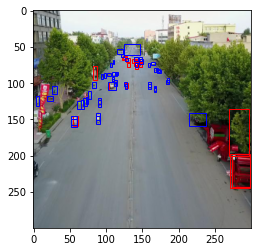

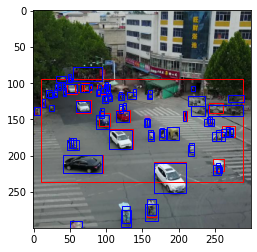

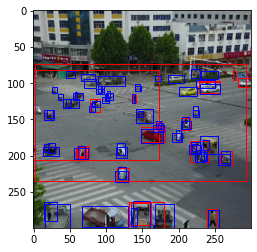

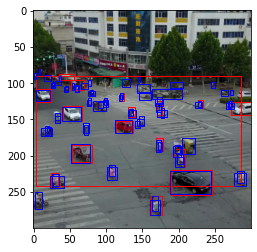

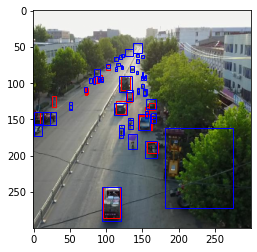

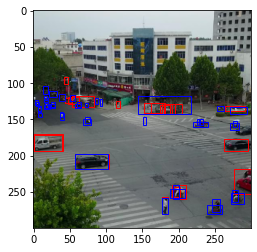

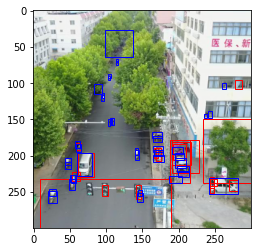

In [182]:
for image_idx in np.arange(6,13,1):
    fig, ax = plt.subplots(1)
    image = inputs[image_idx] / 2 + 0.5
    ax.imshow(image)
    bboxes, classes, confidences = best_results_per_input[image_idx]
    for idx in range(len(bboxes)):
        x = bboxes[idx][0]
        y = bboxes[idx][1]
        w = bboxes[idx][2]
        h = bboxes[idx][3]
        rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    box = pd.DataFrame()
    name = name_image[image_idx][0:-4]
    print(name)
    box = data_annotation_vyb_1.loc[data_annotation_vyb_1.name_annotation == name]
    for idx in range(len(box)):
        x1 = box.bbox_left.iloc[idx]
        x2 = box.bbox_top.iloc[idx]
        x3 = box.bbox_width.iloc[idx]
        x4 = box.bbox_height.iloc[idx]
        rect1 = patches.Rectangle((x1, x2), x3, x4, linewidth=1, edgecolor='blue', facecolor='none')
        ax.add_patch(rect1)
plt.show()